<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 04 **
** ┗ Quality rating **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Checking Quality Data Shipping」
* 🥈Session 2 -「Quality Data Scaling through PCA」
* 🥇Session 3 -「Quality Rating」

In [1]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ▶ Path setting (※ If you activate the COLAB, the COLAB Notebooks folder is automatically generated)
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/04_Product Quality Grading')
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/04_Product Quality Grading'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🍷🅰 (Quality Manager, Production Manager)

``
In factory A, normal products are shipped by grade through each month's quality inspection.Try to ship a certain water with a certain taste with quality, but
VOCs are often collected from the consumer side, which often occurs with a claim (defective field).
They want to produce WINE with a certain taste.

``

> ** Looking at the data **

* It is a process data recorded for quality and quality inspection of the produced wine.
* Data specification ⬇

| Fixed Acidity | Volatile Acidity | Citric Acid | Residual SUGAR | Chlorides | Free sulfur dioxide | Total sulfurDioxide | density | PH | Sulphates | alcohol | Quality |
| ----: | ---: | ---: | ---: | ---: | ---: | ---: ---: ---: ----: ----: ----:-|-|-|-| ---: | ---: |



In [3]:
# Data Read
import pandas as pd
df1 = pd.read_csv('chapter04_winequality_red.csv', sep=';')
df2 = pd.read_csv('chapter04_winequality_white.csv', sep=';')

df=pd.concat([df1, df2], axis=0)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Taste that is not constant in the same quality
``

> ** Expected effect **

``
▶ Certain taste for the same quality, reduced fields, reduced fields, customer claim reduction
``

> ** Solution **

``
▶ WINE production process variables that cause changes in taste and control and control
▶ Session 1 🥉
-Data pretreatment and quality data EDA
▶ Session 2 🥈
-At to look at Quality DATA through dimensional reduction (PCA) method
▶ Session 3 🥇
-Check quality standards, grant grade, and process variables
``

> ** Performance measurement **

``
▶ Comparison of defective rate in major factors before/post field
▶ Comparison rate comparison compared
``

> ** Public application **

``
▶ Inspection DATA real -time collection system that occurs when product quality inspection
▶ Inputs the collected inspection data into Model and then performs high -range product re -inspection
▶ Shipping after re -examination
``

> ** Main code preview **

``
▶ Session 1 → np.where (), plt.subplot ()
▶ Session 2 → StandardScaler (), PCA (), Make_Pipeline (Scaler, PCA)
▶ Session 3 → PCA.FIT_TRANSFORM (), plt.vlines (), plt.hlines ()
``

## ** 🥉Session 1 **
** ┗ Check quality data production **
---

### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)

In [4]:
# ▶ Check the form of data
# ▶ 6497 row, 12 cola
print('df', df.shape)

df (6497, 12)


In [5]:
# ▶ Data Type Check
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [6]:
# ▶ Check NULL value
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# ▶ Outlier verification, negative value check
df.describe ()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### · Quality Data EDA
---
* Collected Data EDA

In [8]:
# ▶ Check data by WINE quality
# ▶ There aren't many data in high quality
df['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [9]:
# ▶ grouping because there is no enough data for analysis
# ▶ 3,4,5 → 1 (Low) / 6 → 2 (Medium) / 7,8,9 → 3 (HIGH)
import numpy as np
df['quality'] = np.where(df['quality']<=5, 1, np.where(df['quality']==6, 2, 3))
df['quality'].value_counts()

,count
quality,
2,2836
1,2384
3,1277


In [10]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


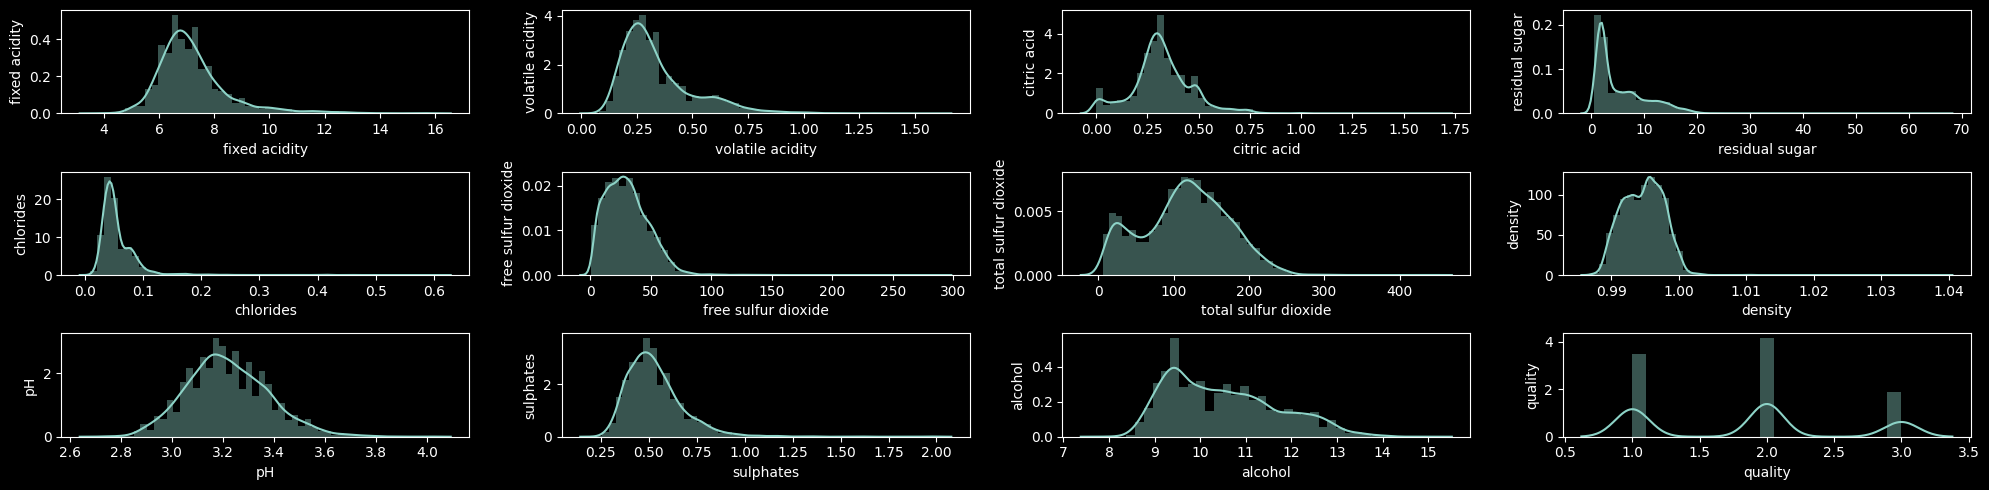

In [11]:
# ▶ Check the entire data data production
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.ylabel(df.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

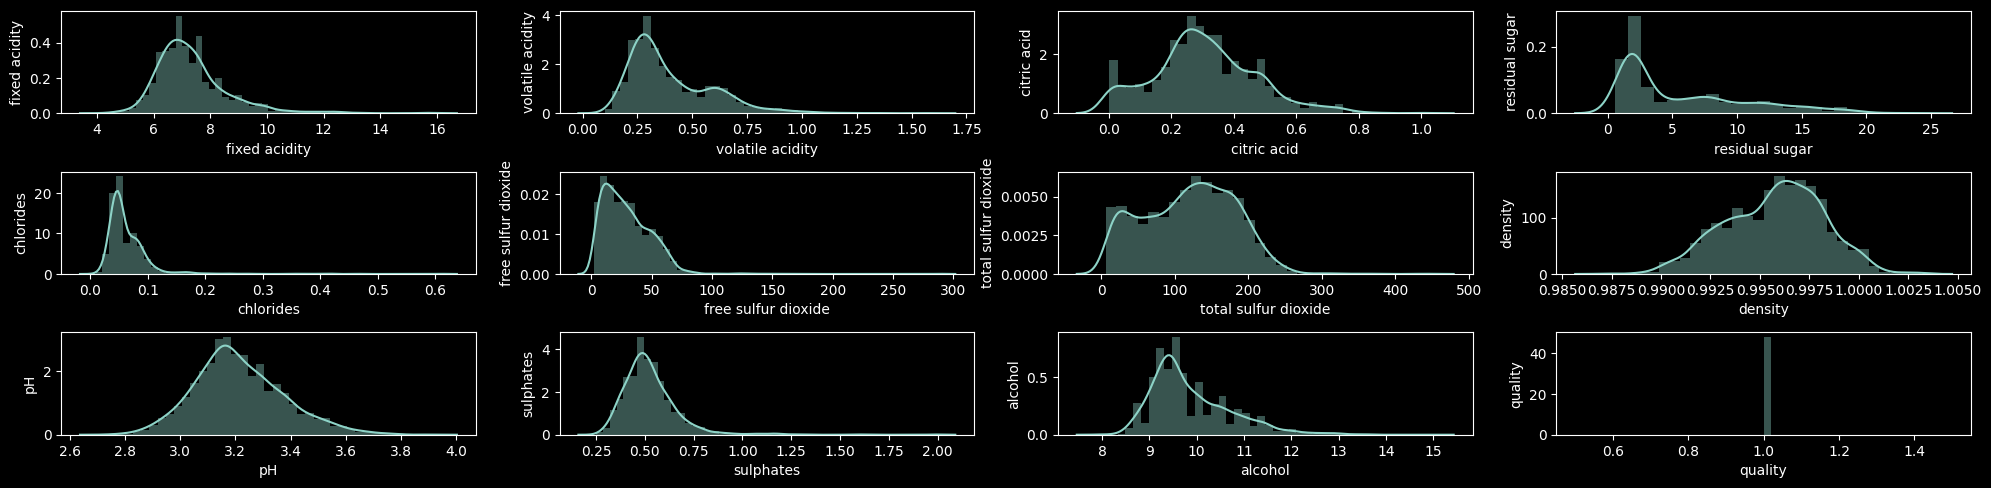

In [12]:
# ▶ Quality Level 1 data production confirmation
df1=df[df['quality']==1]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df1.iloc[:,i])
    plt.ylabel(df1.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

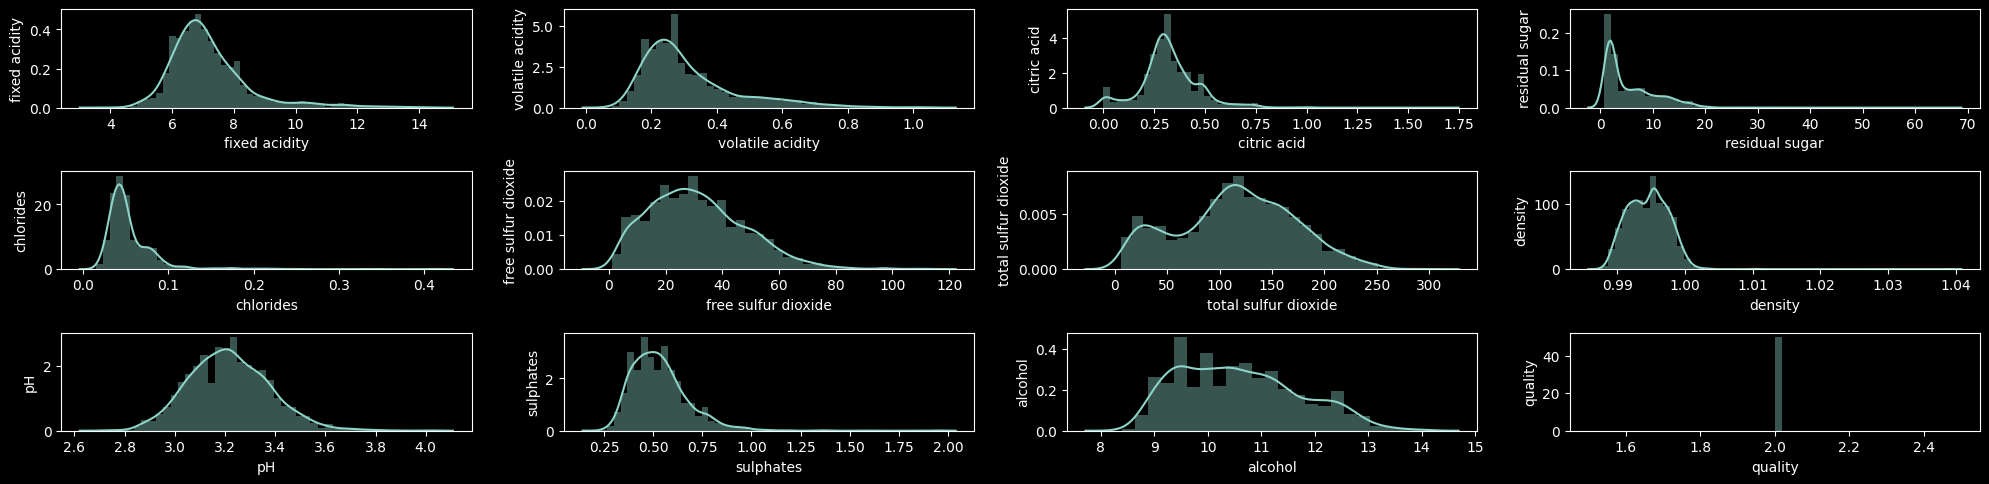

In [13]:
# ▶ Quality 2 grade data production confirmation
df2=df[df['quality']==2]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df2.iloc[:,i])
    plt.ylabel(df2.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

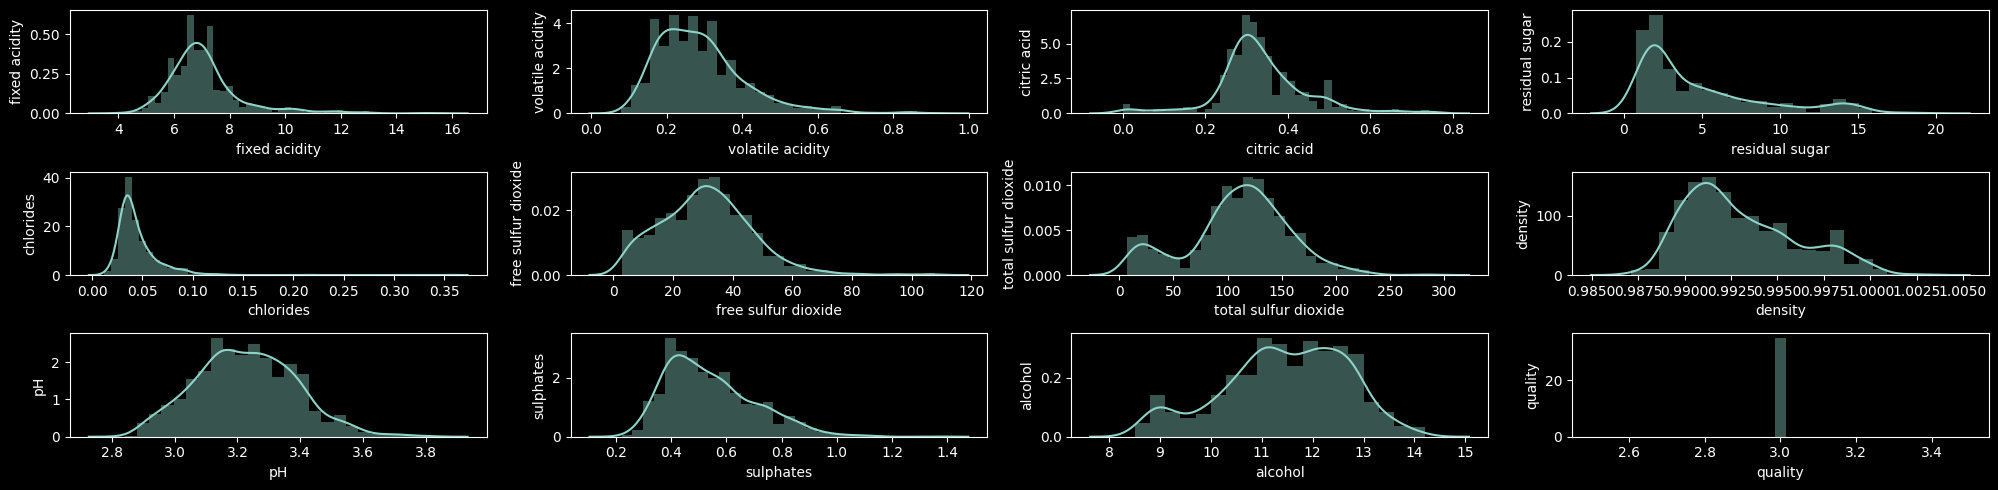

In [14]:
# ▶ Quality 3 grade data production confirmation
df3=df[df['quality']==3]

for i in range(0,12):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    sns.distplot(df3.iloc[:,i])
    plt.ylabel(df3.columns[i])

plt.gcf().set_size_inches(20, 5)
plt.tight_layout()
plt.show();

## ** 🥈Session 2 **
** ┗ Quality data scaling **
---

* WINE products belonging to the same Quality Group must be produced in the same SPEC to be managed to manage fair ability.
* The larger variable (the average and distance from the average) in the WINE process variable, the more variables that require process management.

### · dimension reduction
---
* Wine Quality Data is a 12 -dimensional data except for Index Column and Type ('Red', 'White').
* In this case, we will reduce the dimensions to two dimensions that can be expressed as a graph, and determine the data far from the average as a low quality product.

In [15]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [16]:
# ▶ Check PCA by quality and explanatory power by quality
# ▶ Further study for theory and options for PCA!
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def pca_feature_var(data, var_ratio) :
    roop_ix=data['quality'].unique()

    fig, ax = plt.subplots(len(roop_ix), 1, figsize = (10, 10))

    for i,x in enumerate(roop_ix):
        df1=data[(data['quality']==x)]
        X=df1.drop(['quality'], axis=1)


        # Create scaler: scaler
        scaler = StandardScaler()

        # Create a PCA instance: pca
        pca = PCA()

        # Create pipeline: pipeline
        pipeline = make_pipeline(scaler,pca)

        # Fit the pipeline to 'samples'

        pipeline.fit(X)
        features = range(pca.n_components_)

        feature_df=pd.DataFrame(data=features,columns=['pc_feature'])
        variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
        pc_feature_df=pd.concat([feature_df,variance_df],axis=1)

        cumsum = np.cumsum(pca.explained_variance_ratio_)
        d = np.argmax(cumsum >= var_ratio) + 1
        print('quality:', x ,'/ Number of dimensions :', d, '/ Variable explanatory', cumsum[d-1])
        singular_vector=pd.DataFrame(pca.components_.T,index=X.columns)
        print(singular_vector)
        print("--------------------------------------------------------------------------------------------------------------------------")
        sns.barplot(ax=ax[i], x='pc_feature', y='variance', data=pc_feature_df)
        plt.xlabel('PCA feature')
        plt.ylabel('variance')

quality: 1 / Number of dimensions : 2 / Variable explanatory 0.5021112821016064
                            0         1         2         3         4   \
fixed acidity        -0.162490  0.373834  0.443589 -0.318594  0.158819   
volatile acidity     -0.373864  0.185705 -0.278034 -0.169583 -0.121042   
citric acid           0.249655  0.211955  0.508686  0.140954  0.225848   
residual sugar        0.404717  0.212619 -0.195108 -0.227807  0.248177   
chlorides            -0.208530  0.382601  0.002530  0.478848 -0.375295   
free sulfur dioxide   0.424284  0.023057 -0.190288  0.278266  0.063592   
total sulfur dioxide  0.479926 -0.018223 -0.096433  0.232983  0.006013   
density               0.069653  0.566851 -0.229854 -0.290804  0.255879   
pH                   -0.256704 -0.099886 -0.496858  0.117746  0.517767   
sulphates            -0.194687  0.362455  0.012121  0.567605  0.281887   
alcohol              -0.212643 -0.354559  0.289368  0.127910  0.538129   

                            5  

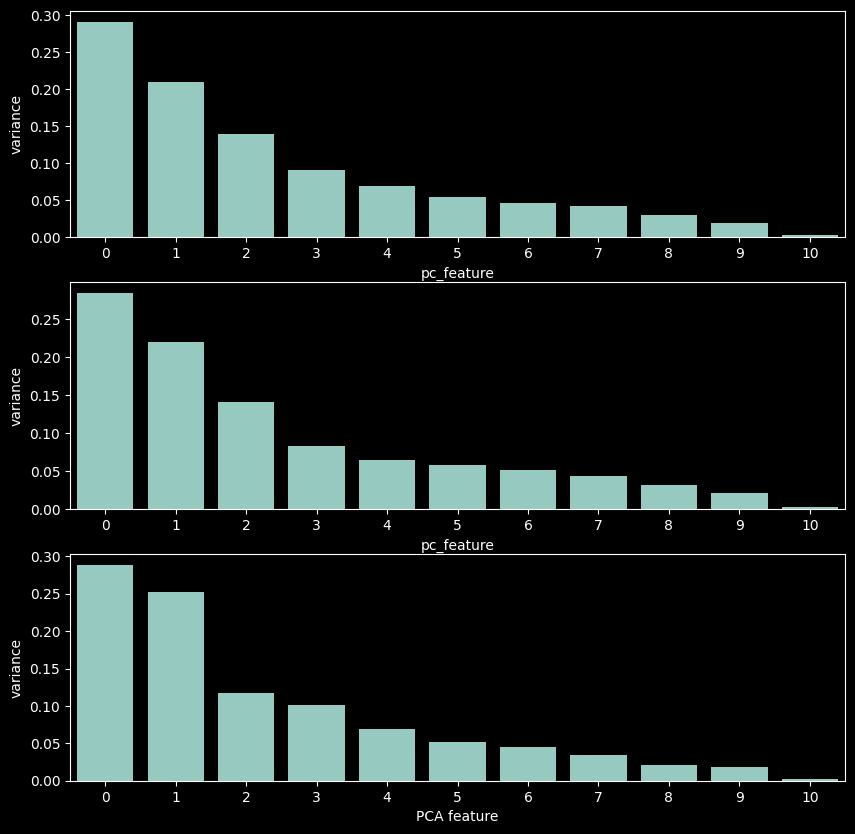

In [17]:
pca_feature_var(df, 0.50)

### · Dimensional Data Plotting
---
* Expressing dimensioned data in a two -dimensional graph

In [18]:
 def pca_plot(df,y) :

       x=df.drop(['quality'], axis=1).reset_index(drop=True)
       y=df[y].reset_index(drop=True)

       X_ = StandardScaler().fit_transform(x)

       pca = PCA(n_components=2)
       pc = pca.fit_transform(X_)

       pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
       pc_df=pd.concat([pc_df,y],axis=1)

       plt.rcParams['figure.figsize'] = [10, 10]
       sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=100, linewidth=0)

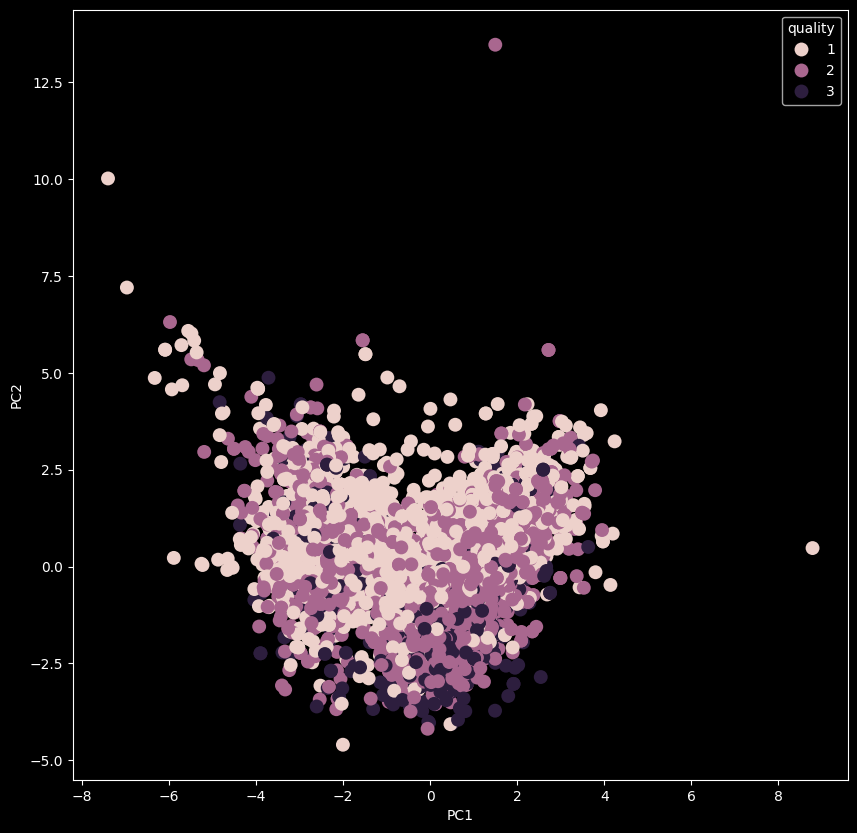

In [19]:
# ▶ Data gathered in the center of (0,0) and data close to the average of each process variable.
# ▶ The more data falling from the center of (0,0), the more away from the average of each process variable, that is, data with a large production.
pca_plot(df,'quality')

In [20]:
def pca_plot_prod(data) :
       roop_ix=data['quality'].unique()
       fig, ax = plt.subplots(len(roop_ix), 1, figsize = (5, 10))

       for i,x in enumerate(roop_ix):

           print("Fig.",i+1,": ",x)


           df1=data[(data['quality']==x)]
           X=df1.drop(['quality'], axis=1)
           y=df1.quality

           X_ = StandardScaler().fit_transform(X)

           pca = PCA(n_components=2)
           pc = pca.fit_transform(X_)

           pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])

           pc_df['quality']=x

           sns.scatterplot(ax=ax[i],data=pc_df,x='PC1',y='PC2', legend='brief', s=50, linewidth=0)

Fig. 1 :  1
Fig. 2 :  2
Fig. 3 :  3


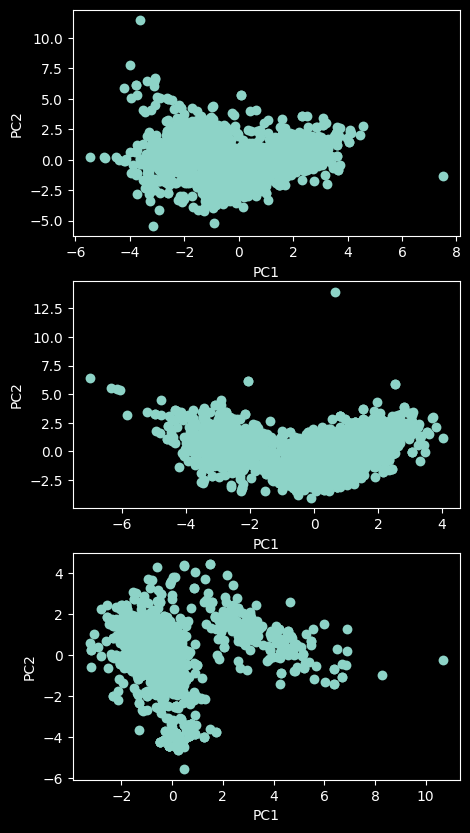

In [21]:
# ▶ Quality
pca_plot_prod(df)

## ** 🥇Session 3 **
** ┗ Quality rating **
---

### · Quality standard setting
---
* Grant A, B, C, based on PCA Plot

In [22]:
# ▶ To grant quality grade, Concat the PC1 value and PC2 value to existing data
# ▶ In practice only for grade 1 (※ Rating 2 and 3 is practice!)

df1=df[(df['quality']==1)]
X=df1.drop(['quality'], axis=1)
X_ = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_)

pc_df=pd.DataFrame(pc,columns=['PC1','PC2'])


df1_concat = pd.concat([df1.reset_index(drop=True), pc_df], axis=1)

In [23]:
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915


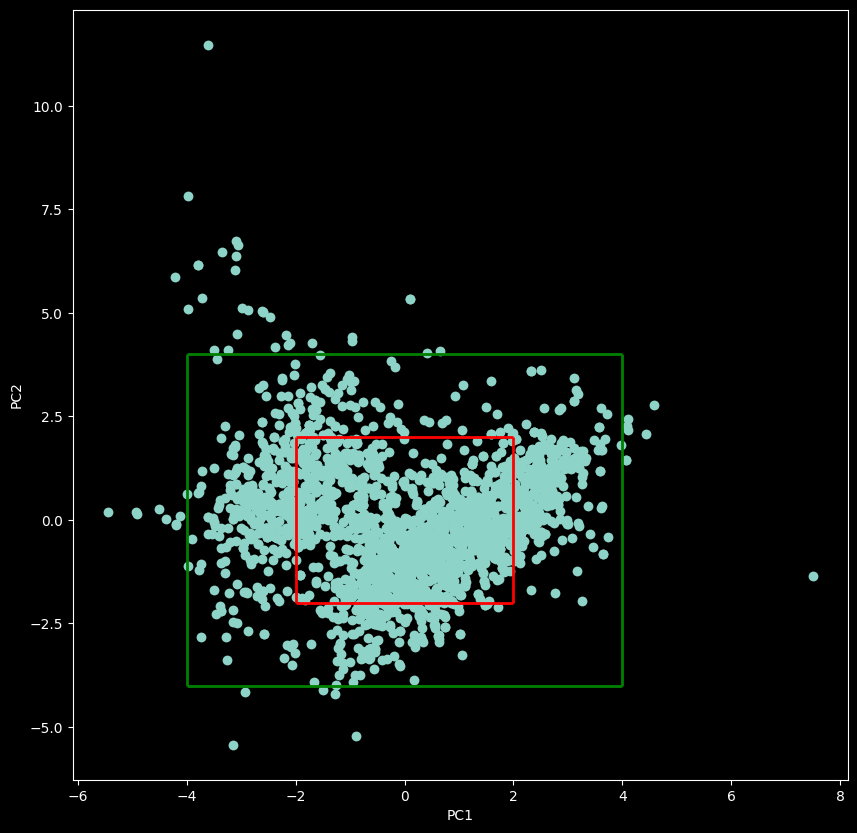

In [24]:
# ▶ granted grade based on 2 and -2, a dimension reduction variable with PC1 and PC2

sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0);
# A grade
plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);

plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

# B grade
plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);

plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

### · Grant quality grade
---
* Assign PCA Plot -based A, B, C

In [25]:
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915


In [26]:
# ▶ NP.where utilization if statement
df1_concat['grade'] = np.where( (df1_concat['PC1']>-2) & (df1_concat['PC1']<2) & (df1_concat['PC2']>-2) & (df1_concat['PC2']<2), 'A',
                               np.where((df1_concat['PC1']>-4) & (df1_concat['PC1']<4) & (df1_concat['PC2']>-4) & (df1_concat['PC2']<4), 'B', 'C') )
df1_concat.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-2.541895,1.071394,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-2.601232,0.863667,B
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-2.839900,0.446147,B
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-2.674377,0.393915,B


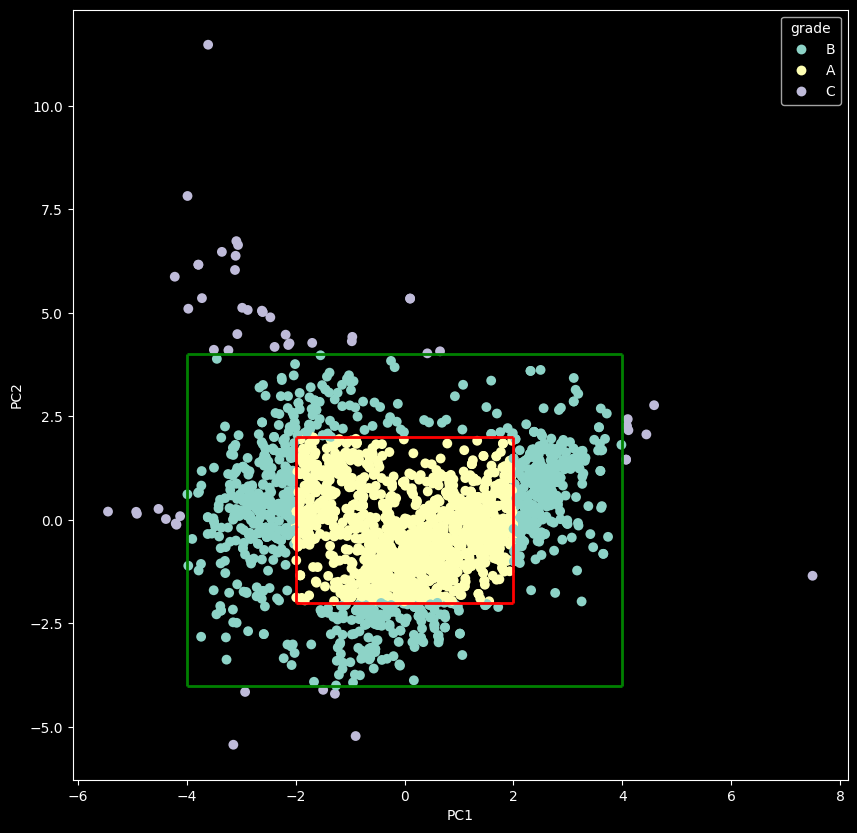

In [27]:
sns.scatterplot(data=df1_concat,x='PC1',y='PC2', s=50, linewidth=0, hue='grade');

# ▶ A grade
plt.vlines(-2, ymin=-2, ymax=2, color='r', linewidth=2);
plt.vlines(2, ymin=-2, ymax=2, color='r', linewidth=2);

plt.hlines(-2, xmin=-2, xmax=2, color='r', linewidth=2);
plt.hlines(2, xmin=-2, xmax=2, color='r', linewidth=2);

# ▶ B grade
plt.vlines(-4, ymin=-4, ymax=4, color='g', linewidth=2);
plt.vlines(4, ymin=-4, ymax=4, color='g', linewidth=2);

plt.hlines(-4, xmin=-4, xmax=4, color='g', linewidth=2);
plt.hlines(4, xmin=-4, xmax=4, color='g', linewidth=2);

plt.gcf().set_size_inches(10, 10)

### · Check process variables according to quality grade
---
* Assign PCA Plot -based A, B, C

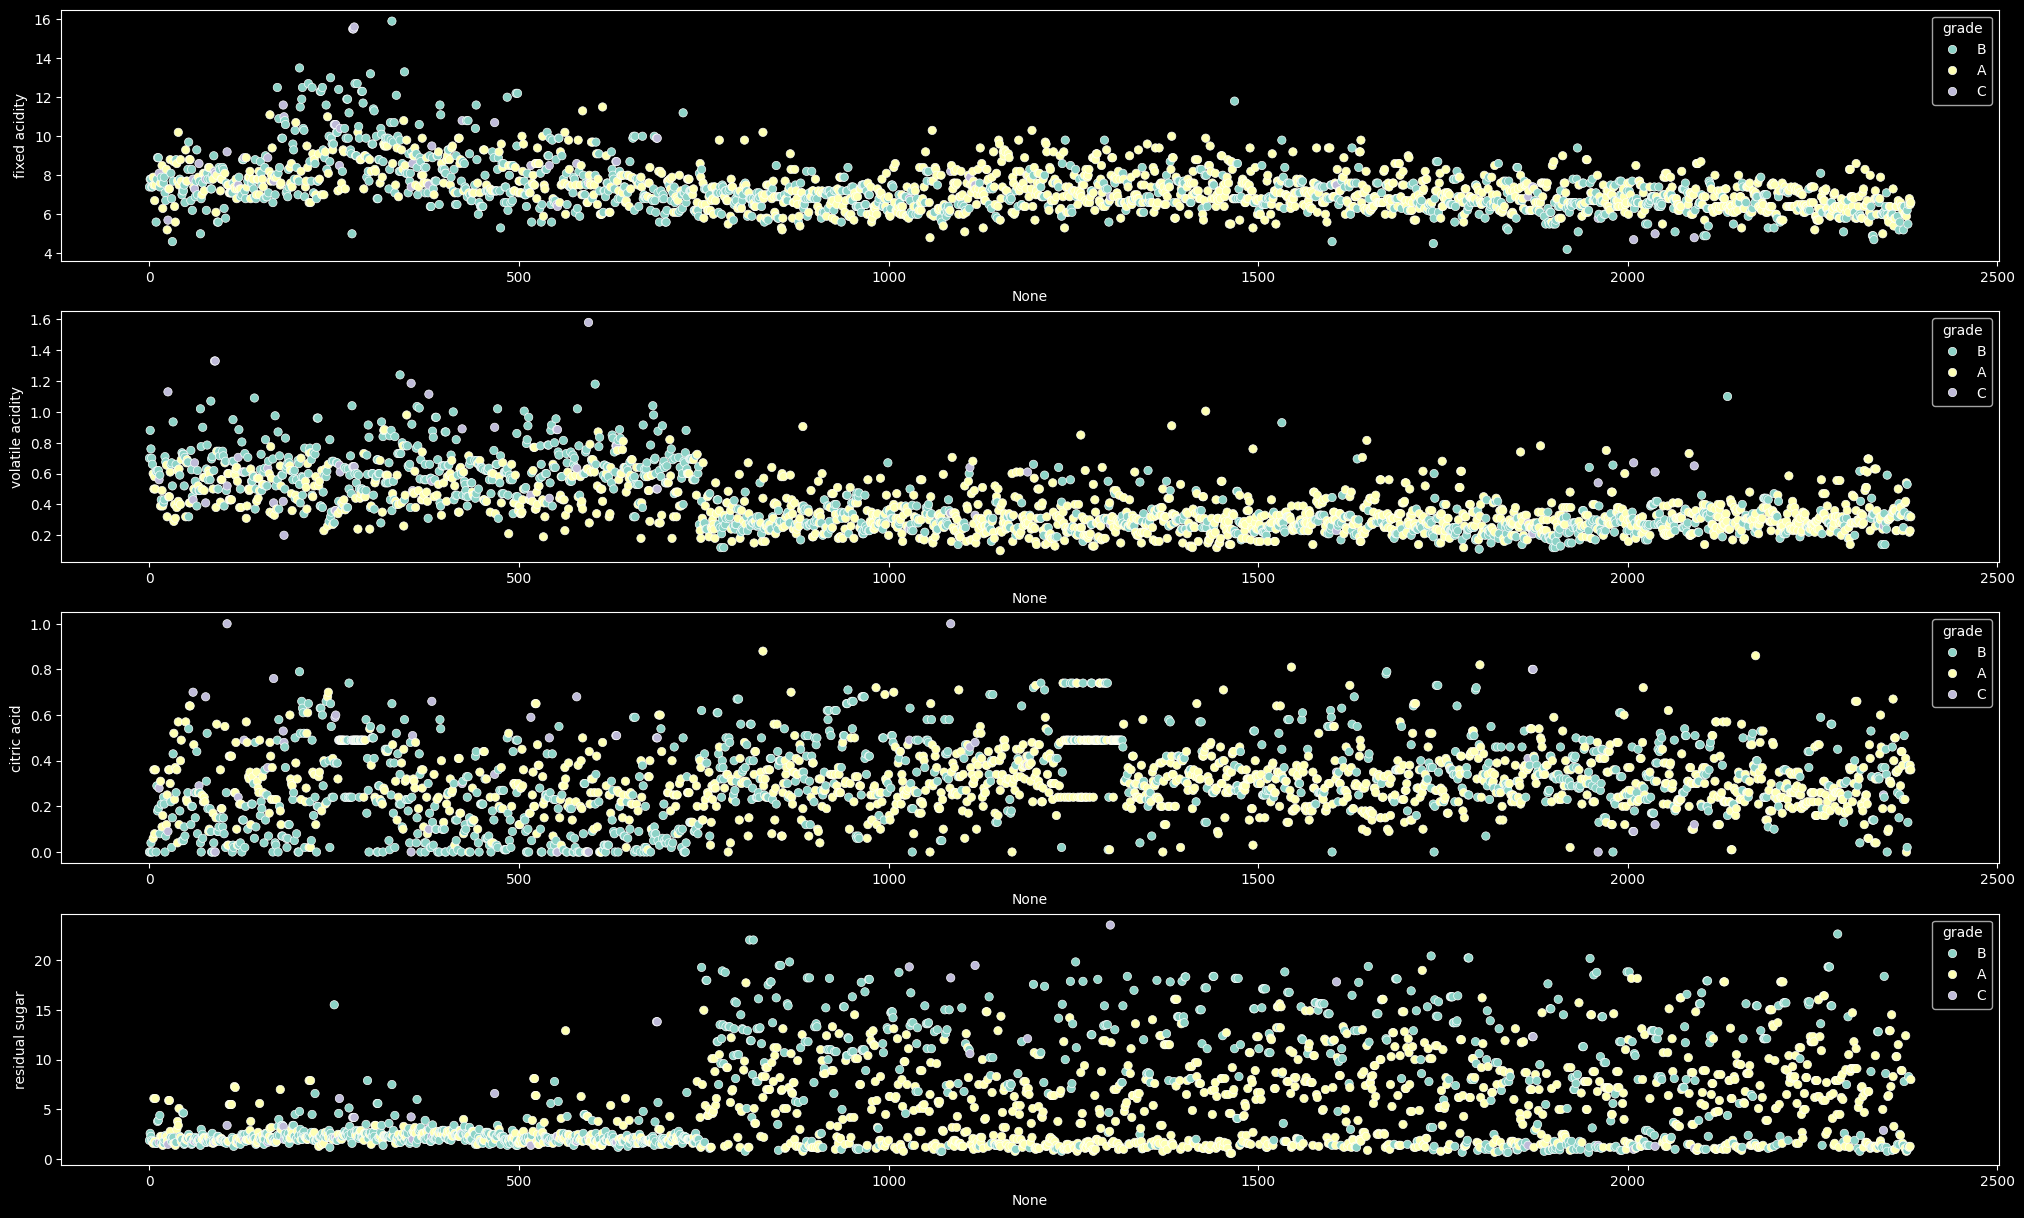

In [28]:
# ▶ Even in the first grade WINE, grade C tends to move away from the average value based on all process variables.
fig, axes = plt.subplots(4, 1)
sns.scatterplot(x=df1_concat.index, y=df1_concat['fixed acidity'], hue = df1_concat['grade'], ax=axes[0]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['volatile acidity'], hue = df1_concat['grade'], ax=axes[1]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['citric acid'], hue = df1_concat['grade'], ax=axes[2]);
sns.scatterplot(x=df1_concat.index, y=df1_concat['residual sugar'], hue = df1_concat['grade'], ax=axes[3]);
plt.gcf().set_size_inches(25, 15)

In [29]:
# ▶ Copy
df = df1_concat.copy()

In [30]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X=df.drop(['quality', 'PC1', 'PC2', 'grade'], axis=1)
Y=df['grade']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1668, 11)
(1668,)
(716, 11)
(716,)


In [31]:
# ▶ Model learning
rfc = RandomForestClassifier(n_estimators=500, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           A       0.90      0.99      0.95       938
           B       0.97      0.86      0.91       693
           C       1.00      0.73      0.84        37

    accuracy                           0.93      1668
   macro avg       0.96      0.86      0.90      1668
weighted avg       0.94      0.93      0.93      1668

              precision    recall  f1-score   support

           A       0.88      0.95      0.91       402
           B       0.89      0.83      0.86       298
           C       1.00      0.19      0.32        16

    accuracy                           0.88       716
   macro avg       0.92      0.66      0.70       716
weighted avg       0.89      0.88      0.88       716



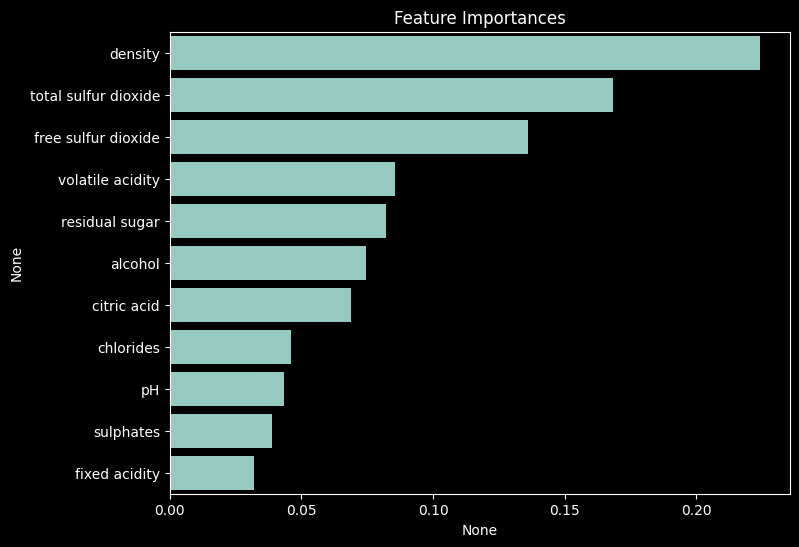

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()